In [243]:
from brian2 import *
%matplotlib inline

# fn's defining the gradients given a certain tuple of values
def get_delta_v(vt, ut, I):
    return 0.04*vt**2+5.*vt+140.-ut+I

def get_delta_u(a, b, vt, ut):
    return a*(b*vt - ut)

In [297]:
def generate_plot_and_print_spike_num_for_b_value(b):
    # init. values
    v = -65; u = 0;
    # constants
    a = 0.0275;
    c = -65; d = 8;
    # time-step used in numerical integration
    dt = 0.005;
    
    v_vals = []; u_vals = []; timesteps = []
    n_steps = 200000
    spike_count = 0
    for i in range(0, n_steps):
        dv = get_delta_v(v, u, 0)
        du = get_delta_u(a, b, v, u)
        v += dv * dt
        u += du * dt
        if(v>=30):
            spike_count += 1
            v = c
            u = u + d
        v_vals += [v]
        u_vals += [u]
        timesteps += [i*dt]


    # plotting
    tot_time = n_steps * dt
    n_bins = 10
    axline_step = tot_time / n_bins
    figure(figsize=(11, 6))
    for l in range(n_bins+1):
        axvline(l*axline_step, ls='--', c='k')
    axhline(30, ls='-', c='lightgray', lw=3)
    plot(timesteps, v_vals, '-', label='v')
    plot(timesteps, u_vals, '-', label='u')
    xlabel('Time (ms)')
    ylabel('v (mV)')
    title('Plot for constant parametrisation, with b='+str(b)+". Oscillating at "+str(spike_count)+" Hz");

    print("last v:", v)
    print("last u:", u)
    print("spike_count: ", spike_count)
    print()
    return spike_count

current b-value: 0.2
last v: -70.00000000000986
last u: -13.999999999995515
spike_count:  0

current b-value: 0.21500000000000002
last v: -68.61790494527064
last u: -14.752849563226736
spike_count:  0

current b-value: 0.23000000000000004
last v: -67.05067337015286
last u: -15.421654875128702
spike_count:  0

current b-value: 0.24500000000000005
last v: -65.16606057401836
last u: -15.965684840628045
spike_count:  0

current b-value: 0.26000000000000006
last v: -62.50000545836495
last u: -16.250000253263348
spike_count:  0

current b-value: 0.2750000000000001
last v: -68.5500548503653
last u: -15.007512279884306
spike_count:  13

current b-value: 0.2900000000000001
last v: -53.912830011154405
last u: -16.80434736282731
spike_count:  16

current b-value: 0.3050000000000001
last v: -74.72812655662905
last u: -9.671561400640815
spike_count:  20

current b-value: 0.3200000000000001
last v: -44.67130285868567
last u: -17.19883782473043
spike_count:  22

current b-value: 0.33500000000000013
l

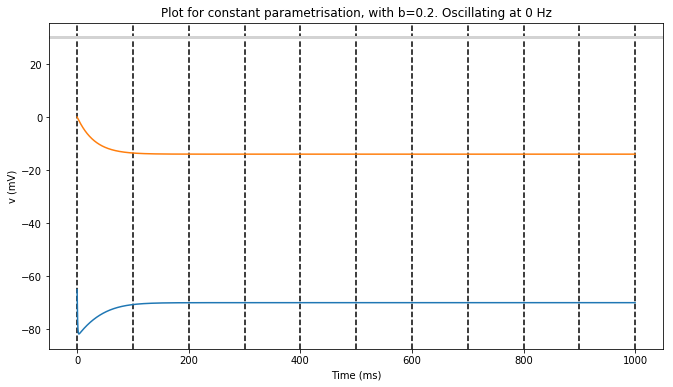

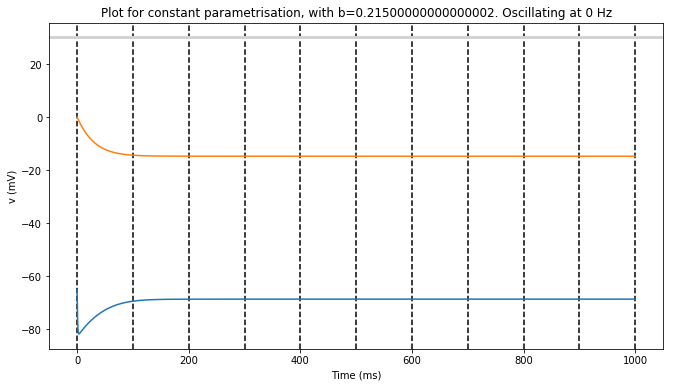

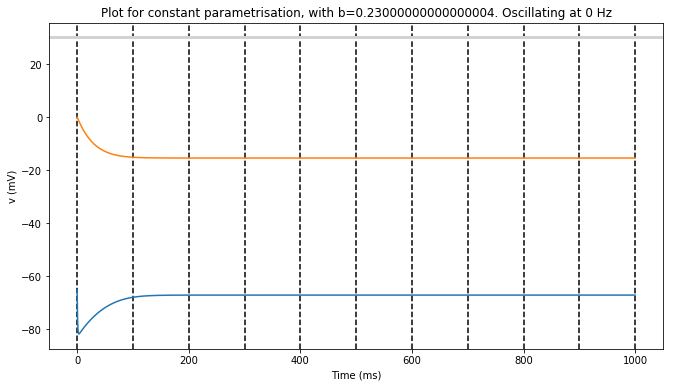

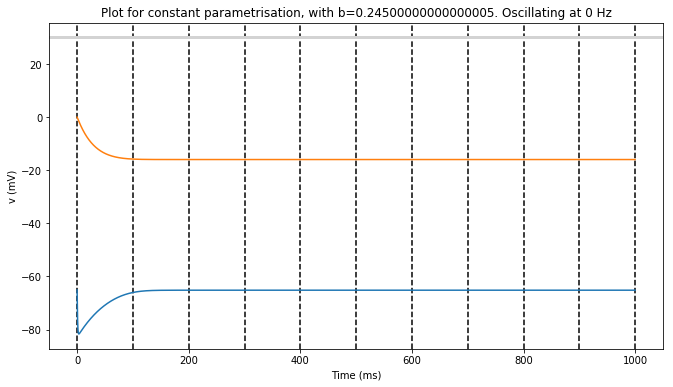

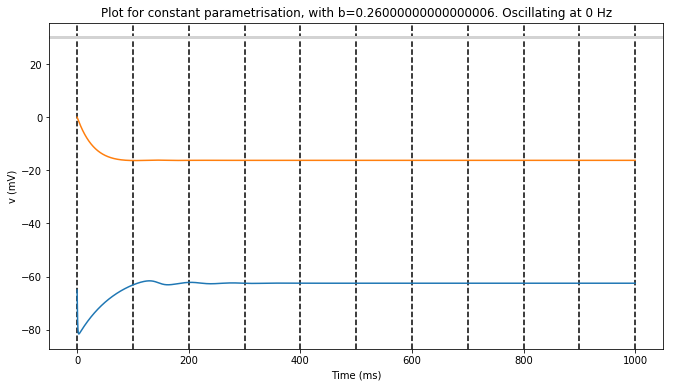

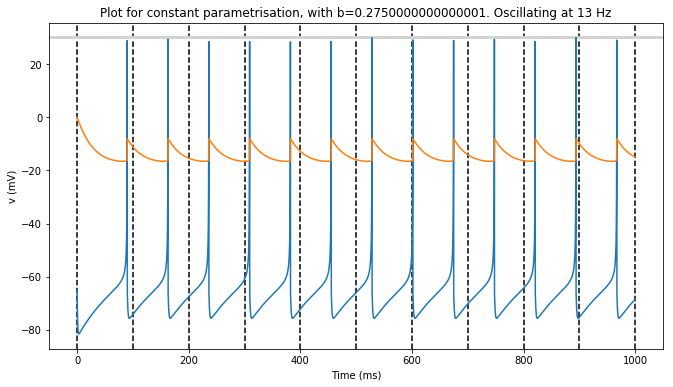

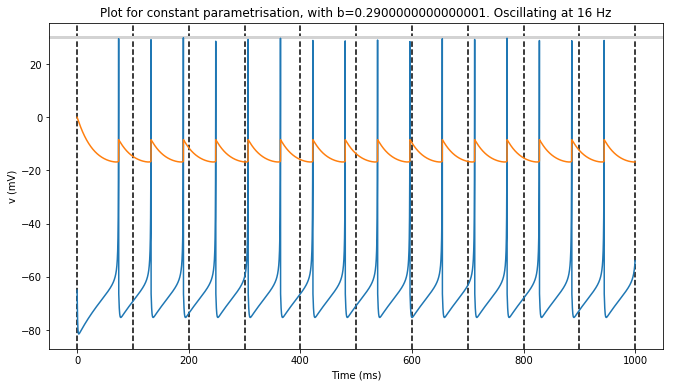

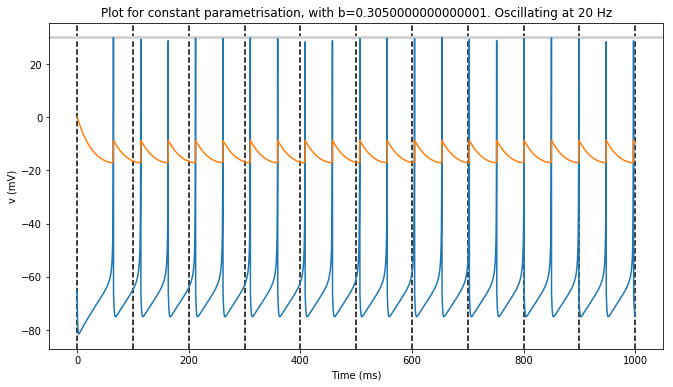

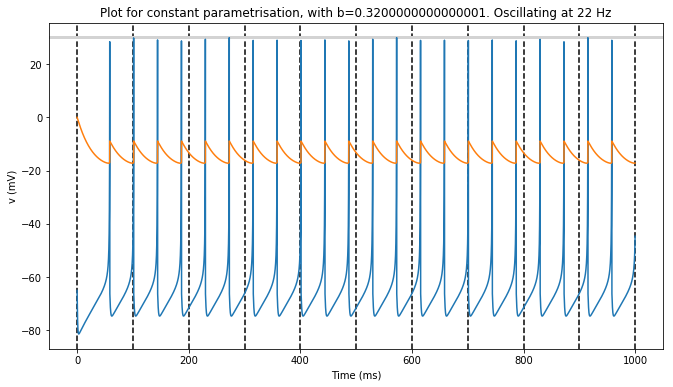

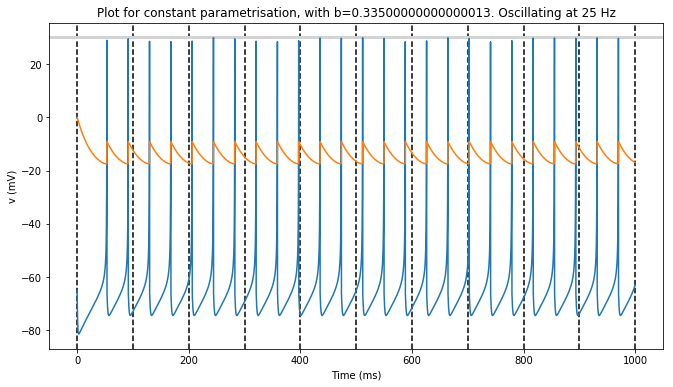

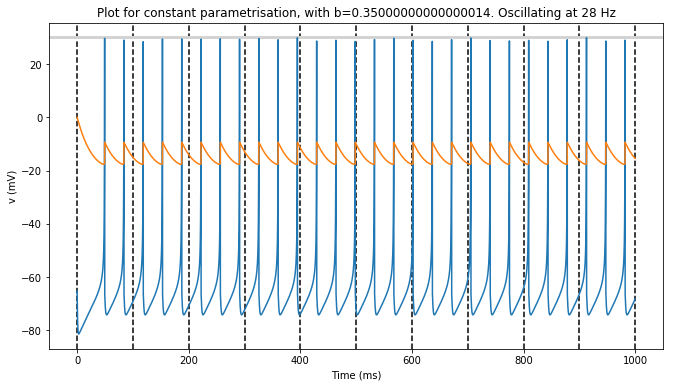

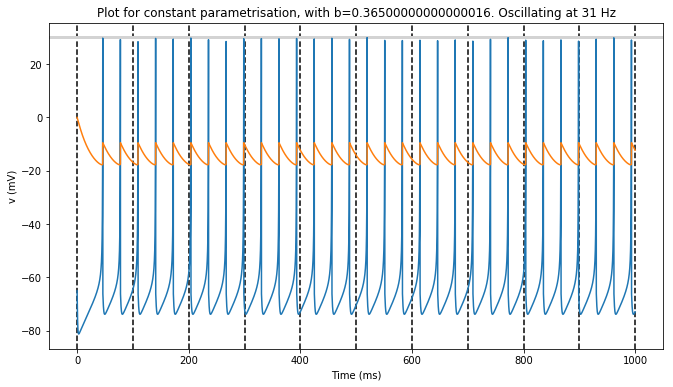

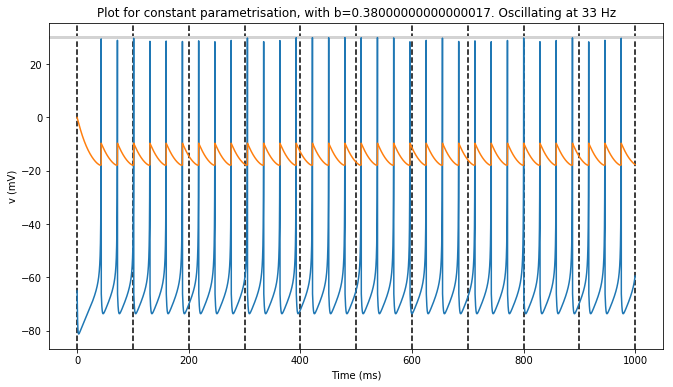

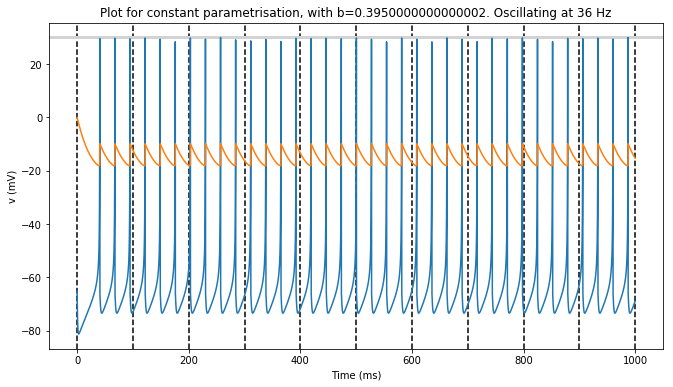

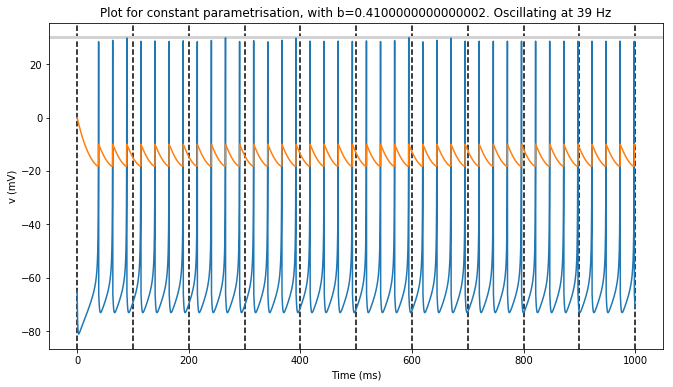

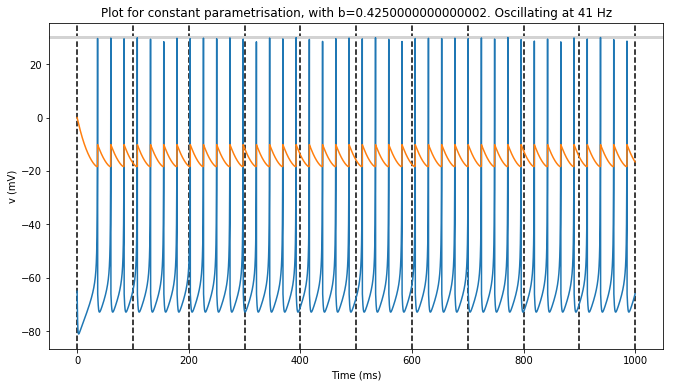

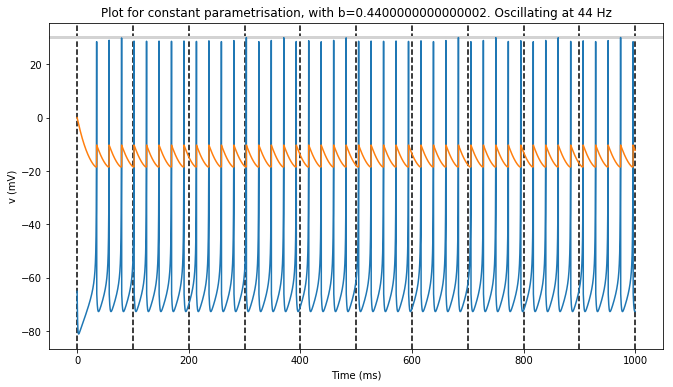

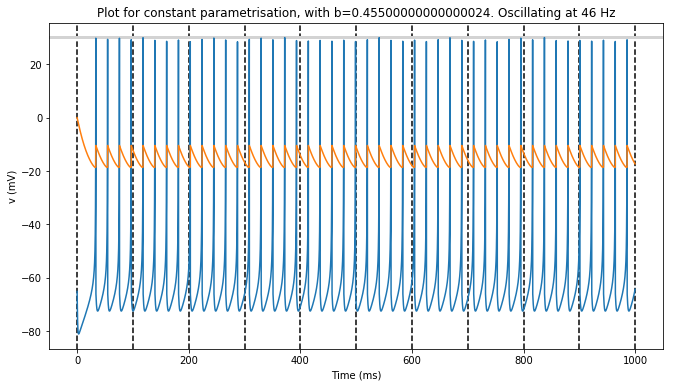

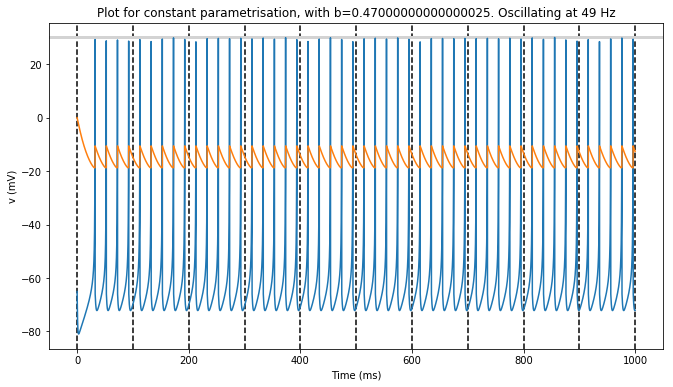

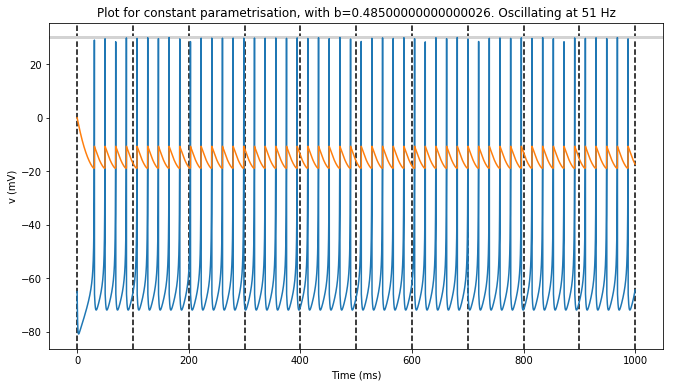

In [298]:
spike_counts = []
b = 0.2
delta_b = 0.015
for t in range(0, 20):
    print("current b-value:", b)
    spike_counts += [generate_plot_and_print_spike_num_for_b_value(b)]
    b += delta_b

In [228]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
